<a href="https://colab.research.google.com/github/Mohon127/Digital_Signal_Processing_Lab/blob/main/dsp_final_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

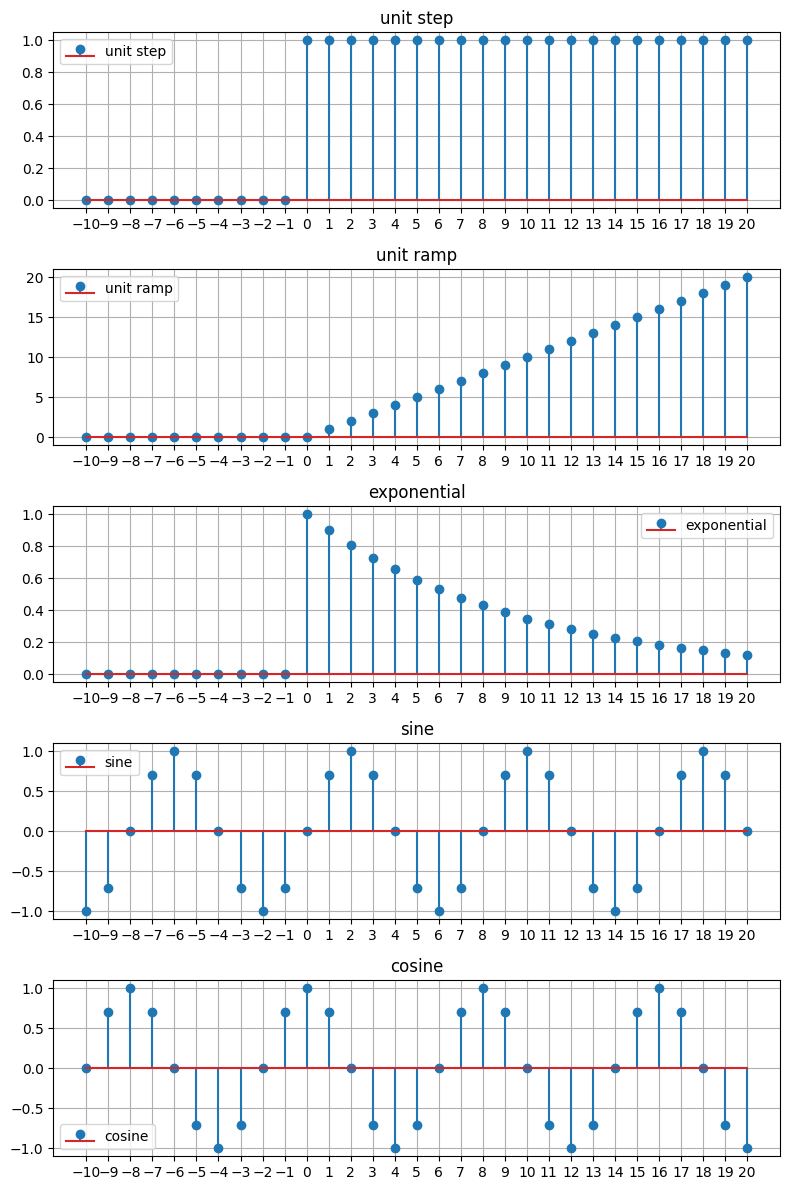

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



n = np.arange(-10, 21)
u = np.where(n>=0, 1, 0)   #unit step
r = u * n                  #unit ramp
e = (0.9 ** n) * u         #exponential
s = np.sin(np.pi/4 * n)    #sin
c = np.cos(np.pi/4 * n)    #cos

signals = [u, r, e, s, c]
titles = ['unit step', 'unit ramp', 'exponential', 'sine', 'cosine']


plt.figure(figsize=(8,12))

for i in range(5):
  plt.subplot(5,1, i+1)
  plt.title(titles[i])
  plt.stem(n, signals[i], label = titles[i])
  plt.legend()
  plt.grid()
  plt.xticks(n)


plt.tight_layout()
plt.show()







3. Consider the continuous-time analog signal x(t)=3cos(100πt). Sample the analog
signal at 200 Hz and 75 Hz. Show the discrete-time signal after sampling. ⟹
realization.  

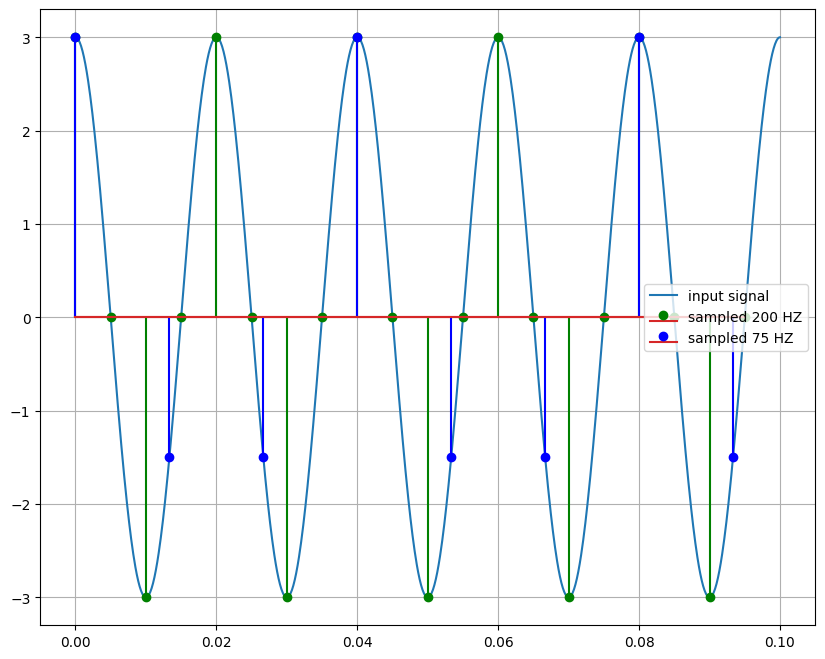

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 0.1, num = 1000)
amp = 3 * np.cos(100 * np.pi * n)

plt.figure(figsize=(10,8))


plt.plot(n, amp, label = 'input signal')
plt.grid(True)
plt.legend()

n = np.arange(0, 0.1, 1/200 )
amp = 3 * np.cos(100 * np.pi * n)


plt.stem(n, amp,'g', label = 'sampled 200 HZ')
plt.legend()
plt.grid(True)


n = np.arange(0, 0.1, 1/75 )
amp = 3 * np.cos(100 * np.pi * n)


plt.stem(n, amp, 'b', label = 'sampled 75 HZ')
plt.legend()
plt.grid(True)



plt.show()

4. Consider the analog signal: xa(t)=3cos(200πt)+5sin(600πt)+10cos(1200πt).
Show the effect of sampling rate.  

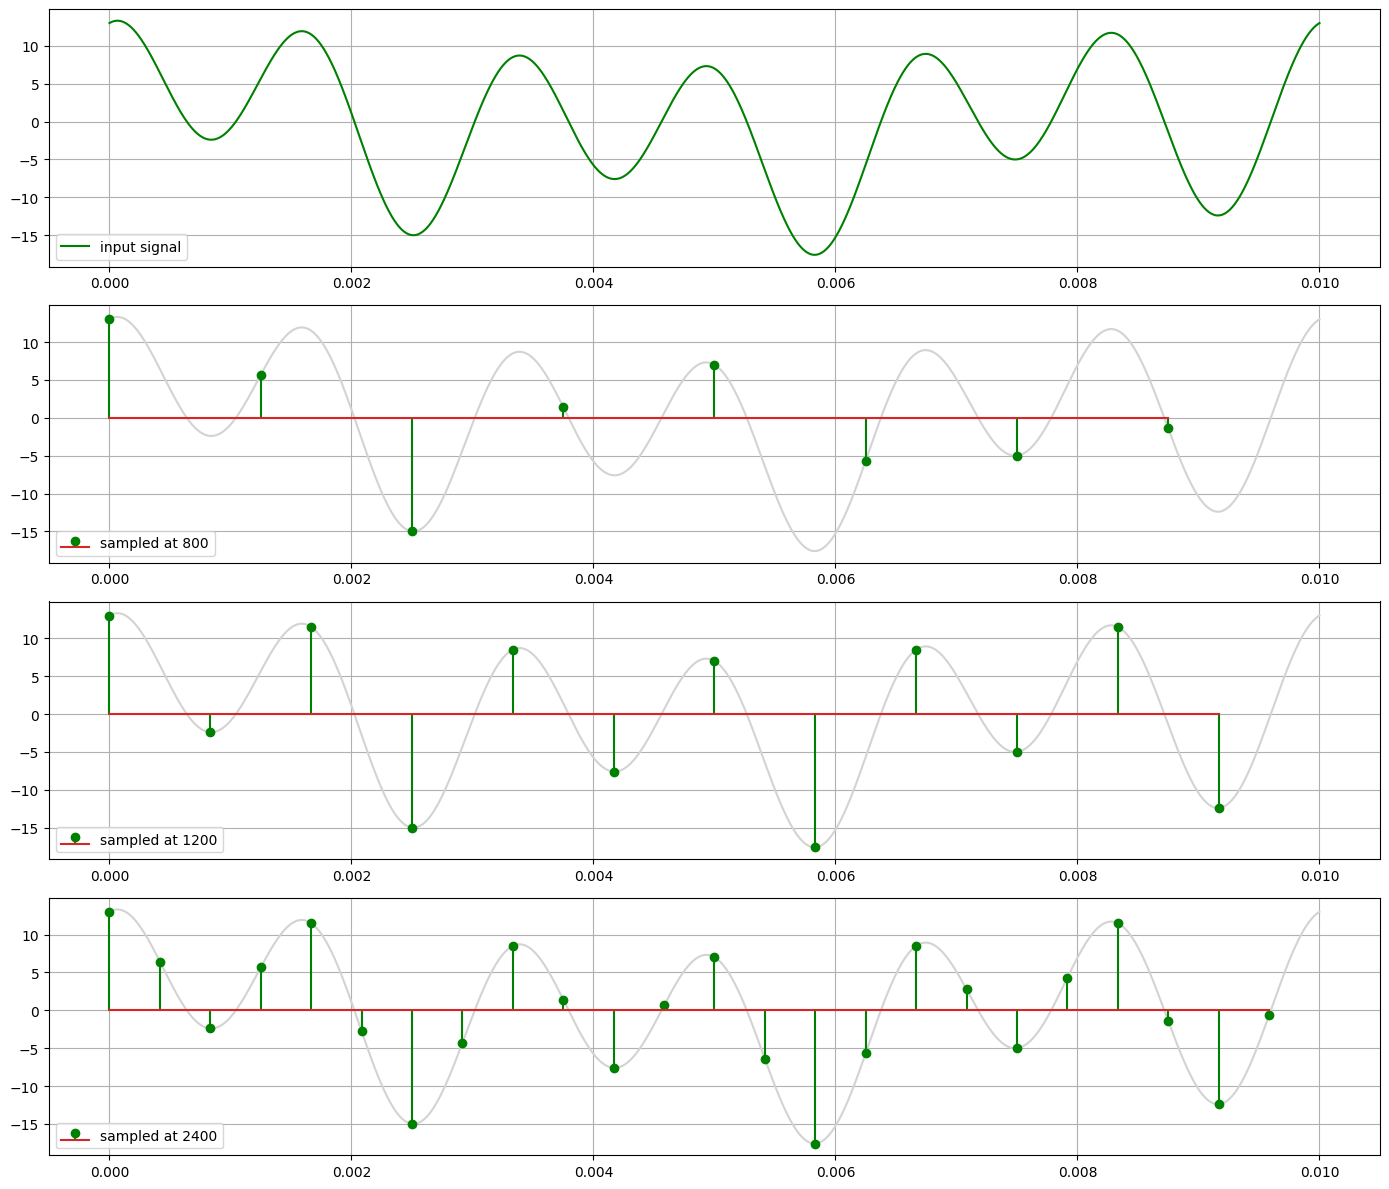

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 0.01, 1000)
amp = 3 * np.cos(200 * np.pi * n) + 5 * np.sin(600 * np.pi * n) + 10 * np.cos(1200 * np.pi * n)


plt.figure(figsize=(14,12))
plt.subplot(4,1,1)
plt.plot(n, amp,'g', label = "input signal")
plt.legend()
plt.grid()


n1 = np.arange(0, 0.01, 1/1200)
amp1 = 3 * np.cos(200 * np.pi * n1) + 5 * np.sin(600 * np.pi * n1) + 10 * np.cos(1200 * np.pi * n1)


samples = [800, 1200, 2400]


for i, fs in enumerate(samples):
  plt.subplot(4,1,i+2)
  plt.plot(n, amp,'lightgray')
  n1 = np.arange(0, 0.01, 1/fs)
  amp1 =  3 * np.cos(200 * np.pi * n1) + 5 * np.sin(600 * np.pi * n1) + 10 * np.cos(1200 * np.pi * n1)
  plt.stem(n1, amp1,'g',  label = f'sampled at {fs}')
  plt.legend()
  plt.grid()



plt.tight_layout()
plt.show()

5.  The impulse response of a discrete-time LTI system is h(n)={u(n)−u(n−5)}.
Determine the output of the system for the input x[n]=u(n), using the convolution
sum.

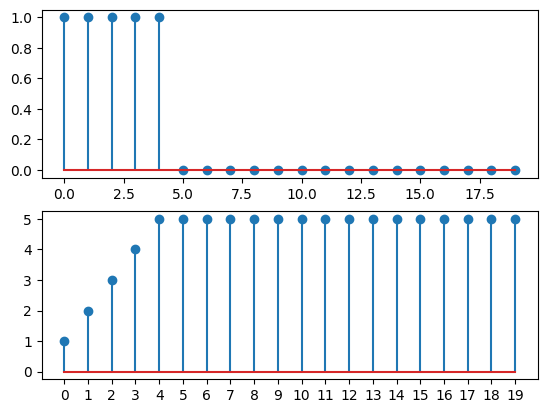

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def u(n):
  return np.where(n>=0, 1, 0)


n = np.arange(0, 20)

h = u(n) - u(n-5)
u = u(n)



plt.subplot(2,1,1)
plt.stem(n, h)

y = np.zeros(len(n))
for i in range(len(h)):
  sum = 0
  for k in range(len(u)):
    if i-k>=0:
      sum += u[k] * h[i-k]
  y[i] = sum

plt.subplot(2,1,2)
plt.stem(n, y)
plt.xticks(n)

plt.show()

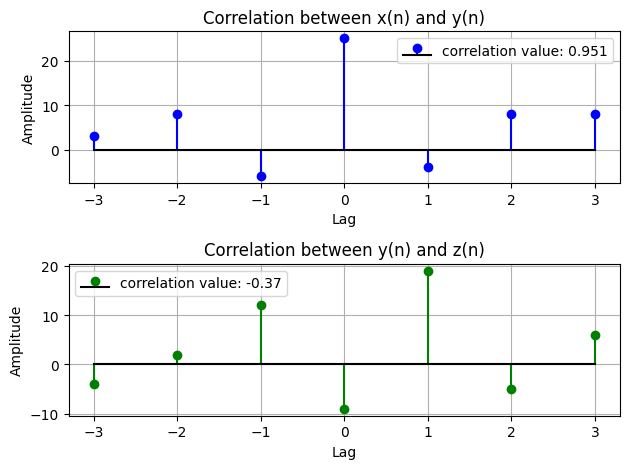

In [ ]:
'''
Given
x(n)=[1,3,−2,4]
y(n)=[2,3,−1,3]
z(n)=[2,−1,4,−2]
Find the correlation between x(n) & y(n) and y(n) & z(n). ⟹ observe the
realization.
'''

import numpy as np
import matplotlib.pyplot as plt

# Define the sequences
x = np.array([1, 3, -2, 4])
y = np.array([2, 3, -1, 3])
z = np.array([2, -1, 4, -2])


# Function to calculate normalized correlation

def normalized_corr(x, y):
    numerator = np.sum(x * y)
    denominator = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    return numerator / denominator


# Calculate the normalized correlation
def correlation(x, y):
        N = len(x) + len(y) - 1
        result = np.zeros(N)

        for i in range(N):
              sum = 0
              for k in range(len(x)):
                    if i-k>=0 and i-k<len(y):
                        sum += x[k] * y[i-k]
              result[i] = sum
        return result


r_xy = normalized_corr(x, y)
r_yz = normalized_corr(y, z)
s = str(r_xy)
s = 'correlation value: ' + s[:5]

r_xy_0 = correlation(x, y[::-1])
r_yz_0 = correlation(y, z[::-1])
lag = np.arange(-len(x) + 1, len(y))

# Display the results

plt.subplot(2, 1, 1)
plt.title('Correlation between x(n) and y(n)')
plt.stem(lag , r_xy_0, label= s, linefmt='b-', basefmt='k-')
plt.legend()
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)



s = str(r_yz)
s = 'correlation value: ' +s[:5]

plt.subplot(2, 1, 2)
plt.title('Correlation between y(n) and z(n)')
plt.stem(lag, r_yz_0, label= s, linefmt='g-', basefmt='k-')
plt.legend()
plt.xlabel('Lag')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

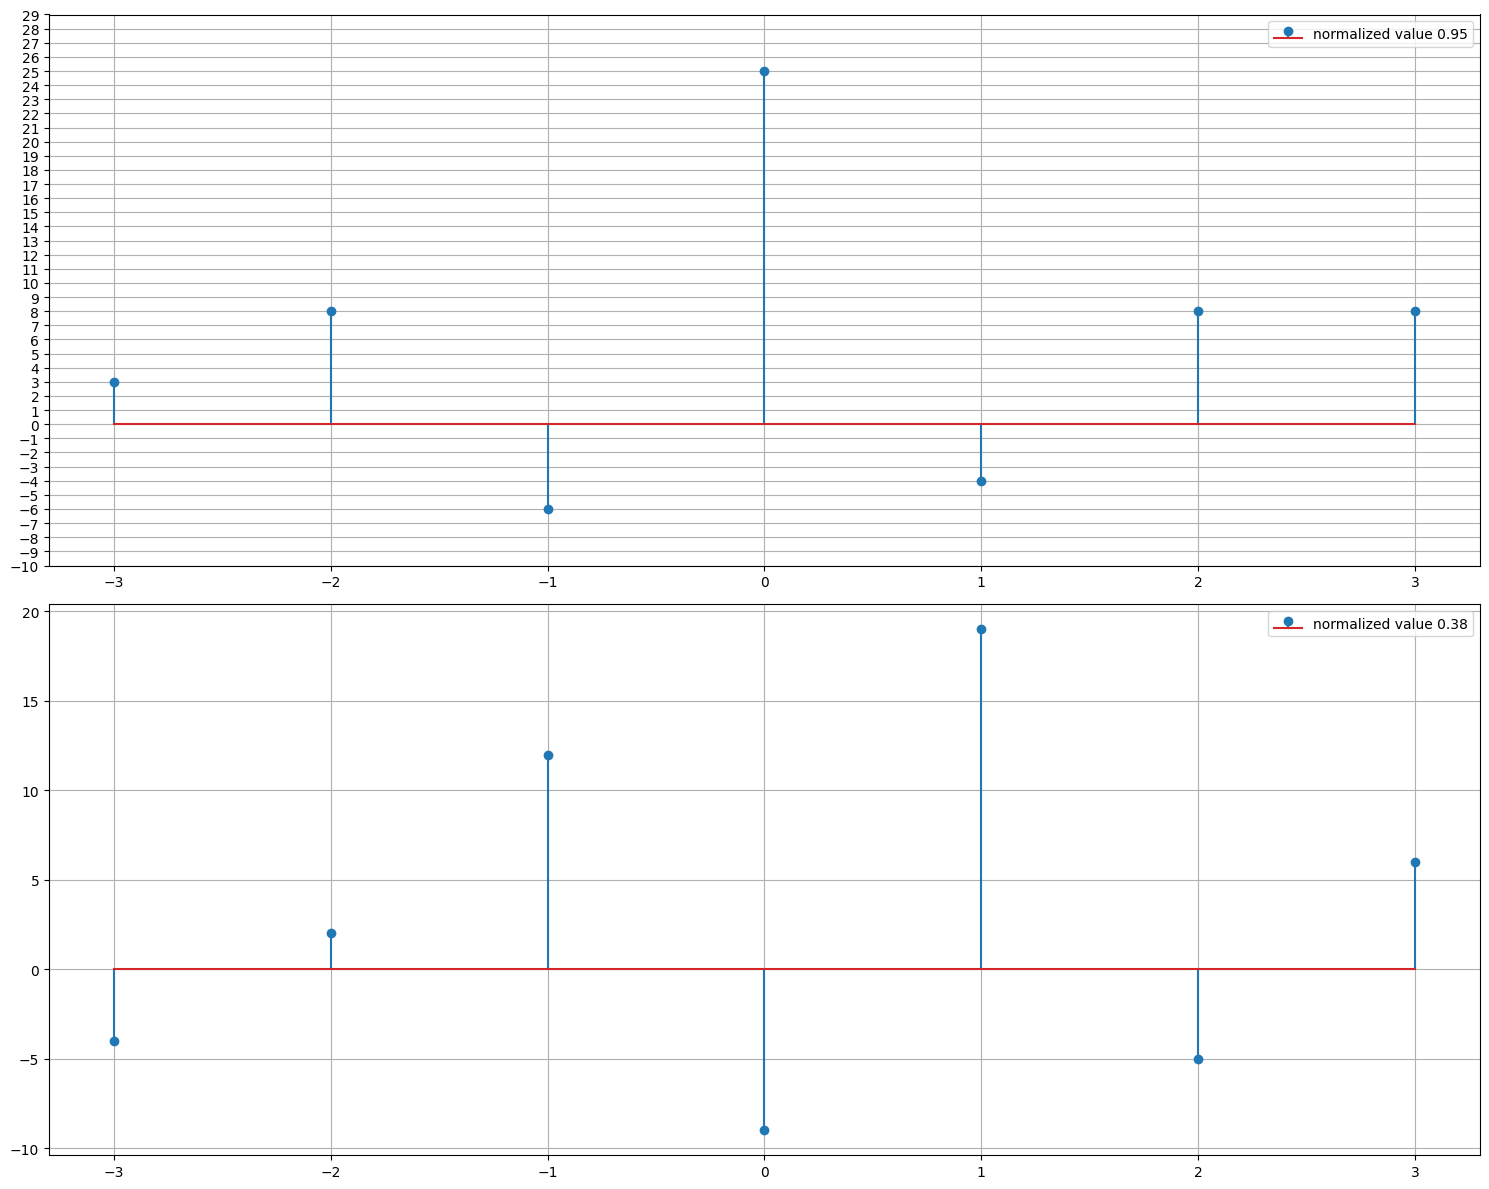

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3, -2, 4])
y = np.array([2, 3, -1, 3])
z = np.array([2, -1, 4, -2])

def norm_value(x, y):
  numerator= np.sum(x*y)
  denominator = np.sqrt(np.sum(x*x) * np.sum(y*y))
  return numerator / denominator


def correlation(x, y):
  N = len(x) + len(y) - 1
  r = np.zeros(N)

  for i in range(N):
    s = 0
    for k in range(len(x)):
      if i-k>=0 and i-k<len(y):
        s += x[k] * y[i-k]
    r[i] = s
  return r


c_xy = correlation(x,y[::-1]);
c_xy_norm = norm_value(x,y)
lag = np.arange(-len(x) + 1, len(y))


plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.stem(lag, c_xy, label = f"normalized value {np.round(abs(c_xy_norm), 2)}")
plt.legend()
plt.yticks(np.arange(-10, 30))
plt.grid(True)


c_xy = correlation(y, z[::-1]);
c_xy_norm = norm_value(y, z)
lag = np.arange(-len(y) + 1, len(z))

plt.subplot(2,1,2)
plt.stem(lag, c_xy, label = f"normalized value {np.round(abs(c_xy_norm), 2)}")
plt.legend()
plt.grid(True)





plt.tight_layout()
plt.show()




7.  Filter realization using 6-point averaging, 6-point differencing equations.

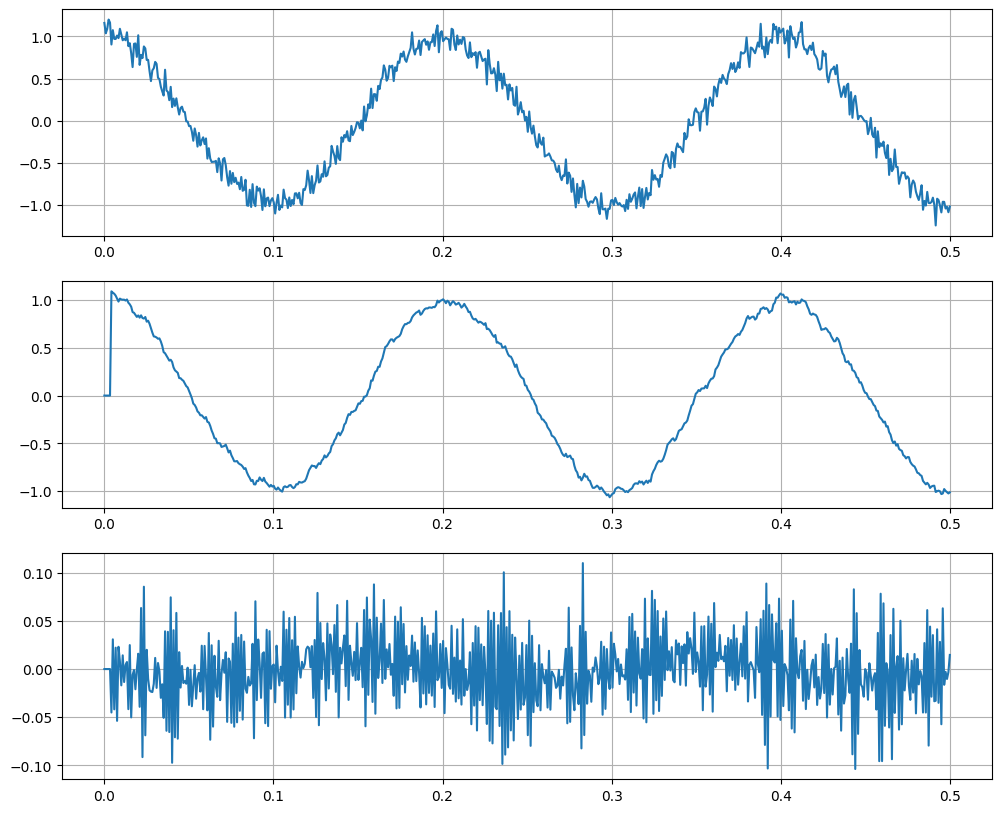

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = np.linspace(0, 0.5 , 600)
x = np.cos(2* np.pi * 5 * n) + 0.09 * np.random.randn(len(n))

def avg(x):
  y = np.zeros(len(x))
  for i in range(5, len(x)):
    y[i] = (np.sum(x[i-5 : i+1])) / 6
  return y

def dif(x):
  y = np.zeros(len(x))

  for i in range(5, len(x)):
    y[i] = (x[i] - x[i-1] + x[i-2] - x[i-3] + x[i-4] - x[i-5]) / 6
  return y

plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(n, x)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(n, avg(x))
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(n, dif(x))
plt.grid(True)

plt.show()

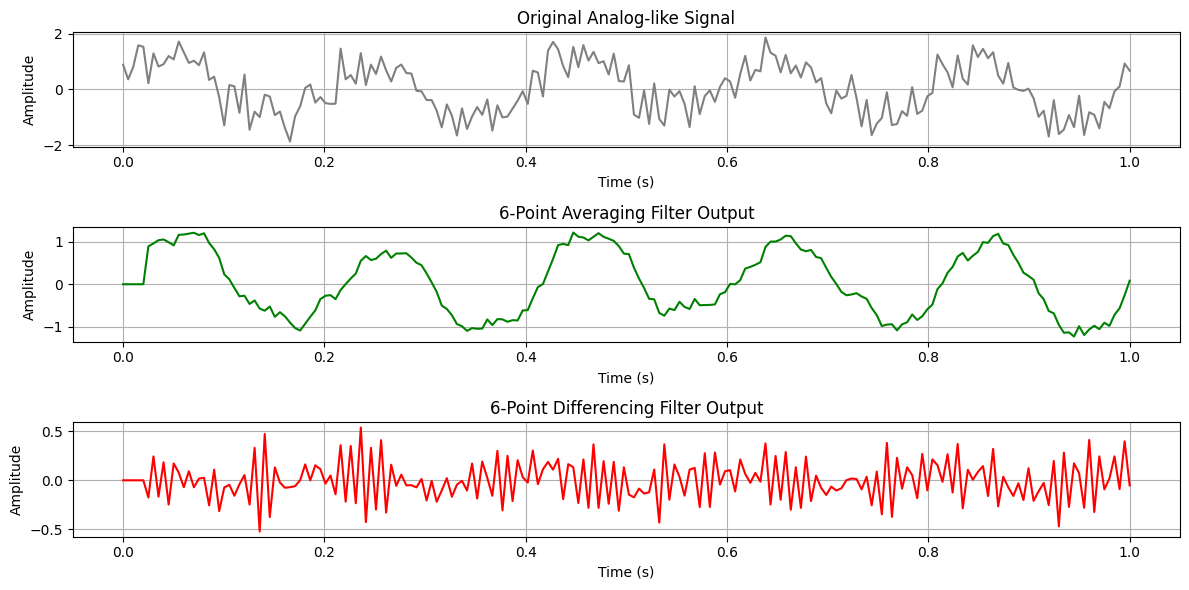

In [ ]:
'''
Filter realization using 6-point averaging, 6-point differencing equations.
'''

import numpy as np
import matplotlib.pyplot as plt

# Sample input signal (analog-like)
np.random.seed(0)
n = np.linspace(0, 1, 200)
x = np.sin(2 * np.pi * 5 * n) + 0.5 * np.random.randn(len(n))  # 5 Hz sine + noise

# 6-point Averaging Filter
def avg_filter(x):
    y = np.zeros_like(x)
    for i in range(5, len(x)):
        y[i] = np.sum(x[i-5:i+1]) / 6
    return y

# 6-point Differencing Filter
def diff_filter(x):
    y = np.zeros_like(x)
    for i in range(5, len(x)):
        y[i] = (x[i] - x[i-1] + x[i-2] - x[i-3] + x[i-4] - x[i-5]) / 6
    return y

# Plotting function
def plot_signal(x, y, title, color='b'):
    plt.plot(x, y, color=color)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Apply filters
y_avg = avg_filter(x)
y_diff = diff_filter(x)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plot_signal(n, x, 'Original Analog-like Signal', 'gray')

plt.subplot(3, 1, 2)
plot_signal(n, y_avg, '6-Point Averaging Filter Output', 'green')

plt.subplot(3, 1, 3)
plot_signal(n, y_diff, '6-Point Differencing Filter Output', 'red')

plt.tight_layout()
plt.show()

8.  DFT of xa(t)=sin(2π⋅1000t)+0.5sin(2π⋅2000t+4π).

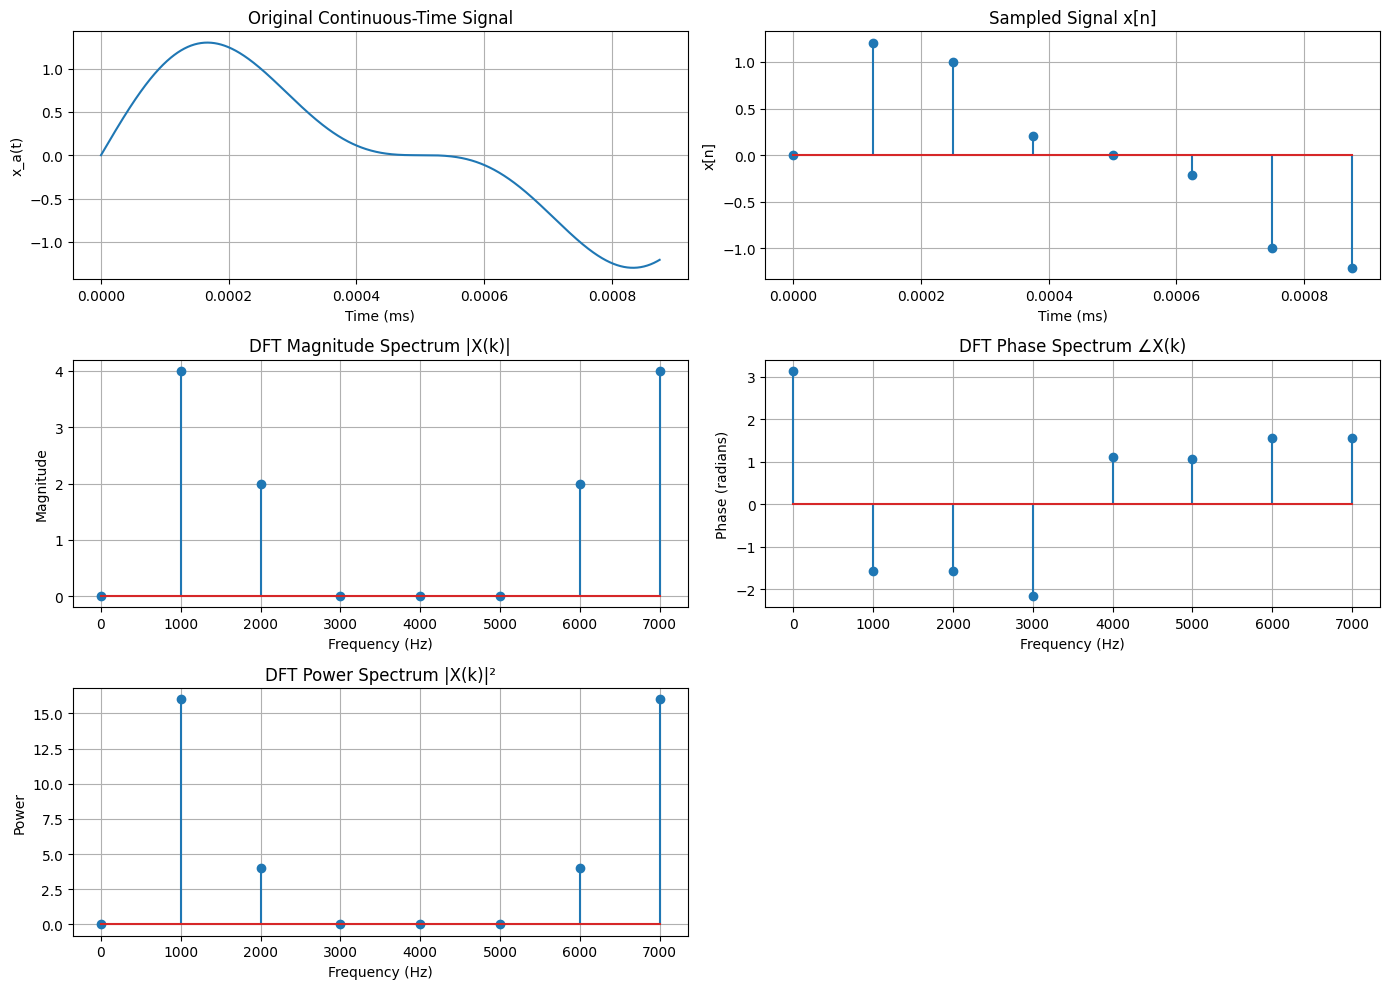

Sampled values x[n]: [-0.      1.2071  1.      0.2071 -0.     -0.2071 -1.     -1.2071]
DFT Magnitudes |X(k)|: [0. 4. 2. 0. 0. 0. 2. 4.]
DFT Phases ∠X(k): [ 3.1416 -1.5708 -1.5708 -2.1588  1.1105  1.0637  1.5708  1.5708]
Frequencies (Hz): [   0 1000 2000 3000 4000 5000 6000 7000]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define original continuous-time signal for plotting
def continuous_signal(t):
    return np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 4 * np.pi)

# Step 2: Sampling parameters
fs = 8000           # Sampling frequency in Hz
N = 8               # Number of samples for DFT
Ts = 1 / fs         # Sampling interval

# Time axis for plotting continuous signal (1ms)
t_cont = np.linspace(0, (N-1)*Ts, 1000)
x_cont = continuous_signal(t_cont)

# Step 3: Sample the signal
n = np.arange(N)
t_sampled = n * Ts
x_sampled = continuous_signal(t_sampled)

# Step 4: User-defined DFT function
def dft(x):
    N = len(x)
    X = []
    for k in range(N):
        val = 0
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            val += x[n] * np.exp(angle)
        X.append(val)
    return np.array(X)

# Compute DFT using user-defined function
X = dft(x_sampled)
mag = np.abs(X)
phase = np.angle(X)
power = mag**2
freqs = np.arange(N) * fs / N

# Step 5: Plot everything

plt.figure(figsize=(14, 10))

# Plot 1: Continuous-time signal
plt.subplot(3, 2, 1)
plt.plot(t_cont , x_cont)
plt.title("Original Continuous-Time Signal")
plt.xlabel("Time (ms)")
plt.ylabel("x_a(t)")
plt.grid(True)

# Plot 2: Sampled signal
plt.subplot(3, 2, 2)
plt.stem(t_sampled, x_sampled)
plt.title("Sampled Signal x[n]")
plt.xlabel("Time (ms)")
plt.ylabel("x[n]")
plt.grid(True)

# Plot 3: Magnitude Spectrum
plt.subplot(3, 2, 3)
plt.stem(freqs, mag)
plt.title("DFT Magnitude Spectrum |X(k)|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

# Plot 4: Phase Spectrum
plt.subplot(3, 2, 4)
plt.stem(freqs, phase)
plt.title("DFT Phase Spectrum ∠X(k)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid(True)

# Plot 5: Power Spectrum
plt.subplot(3, 2, 5)
plt.stem(freqs, power)
plt.title("DFT Power Spectrum |X(k)|²")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print numerical values
print("Sampled values x[n]:", np.round(x_sampled, 4))
print("DFT Magnitudes |X(k)|:", np.round(mag, 4))
print("DFT Phases ∠X(k):", np.round(phase, 4))
print("Frequencies (Hz):", freqs.astype(int))


 8.Final code :
  DFT of xa(t)=sin(2π⋅1000t)+0.5sin(2π⋅2000t+4π). Also IDFT. DFT with
window + window function realization.

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


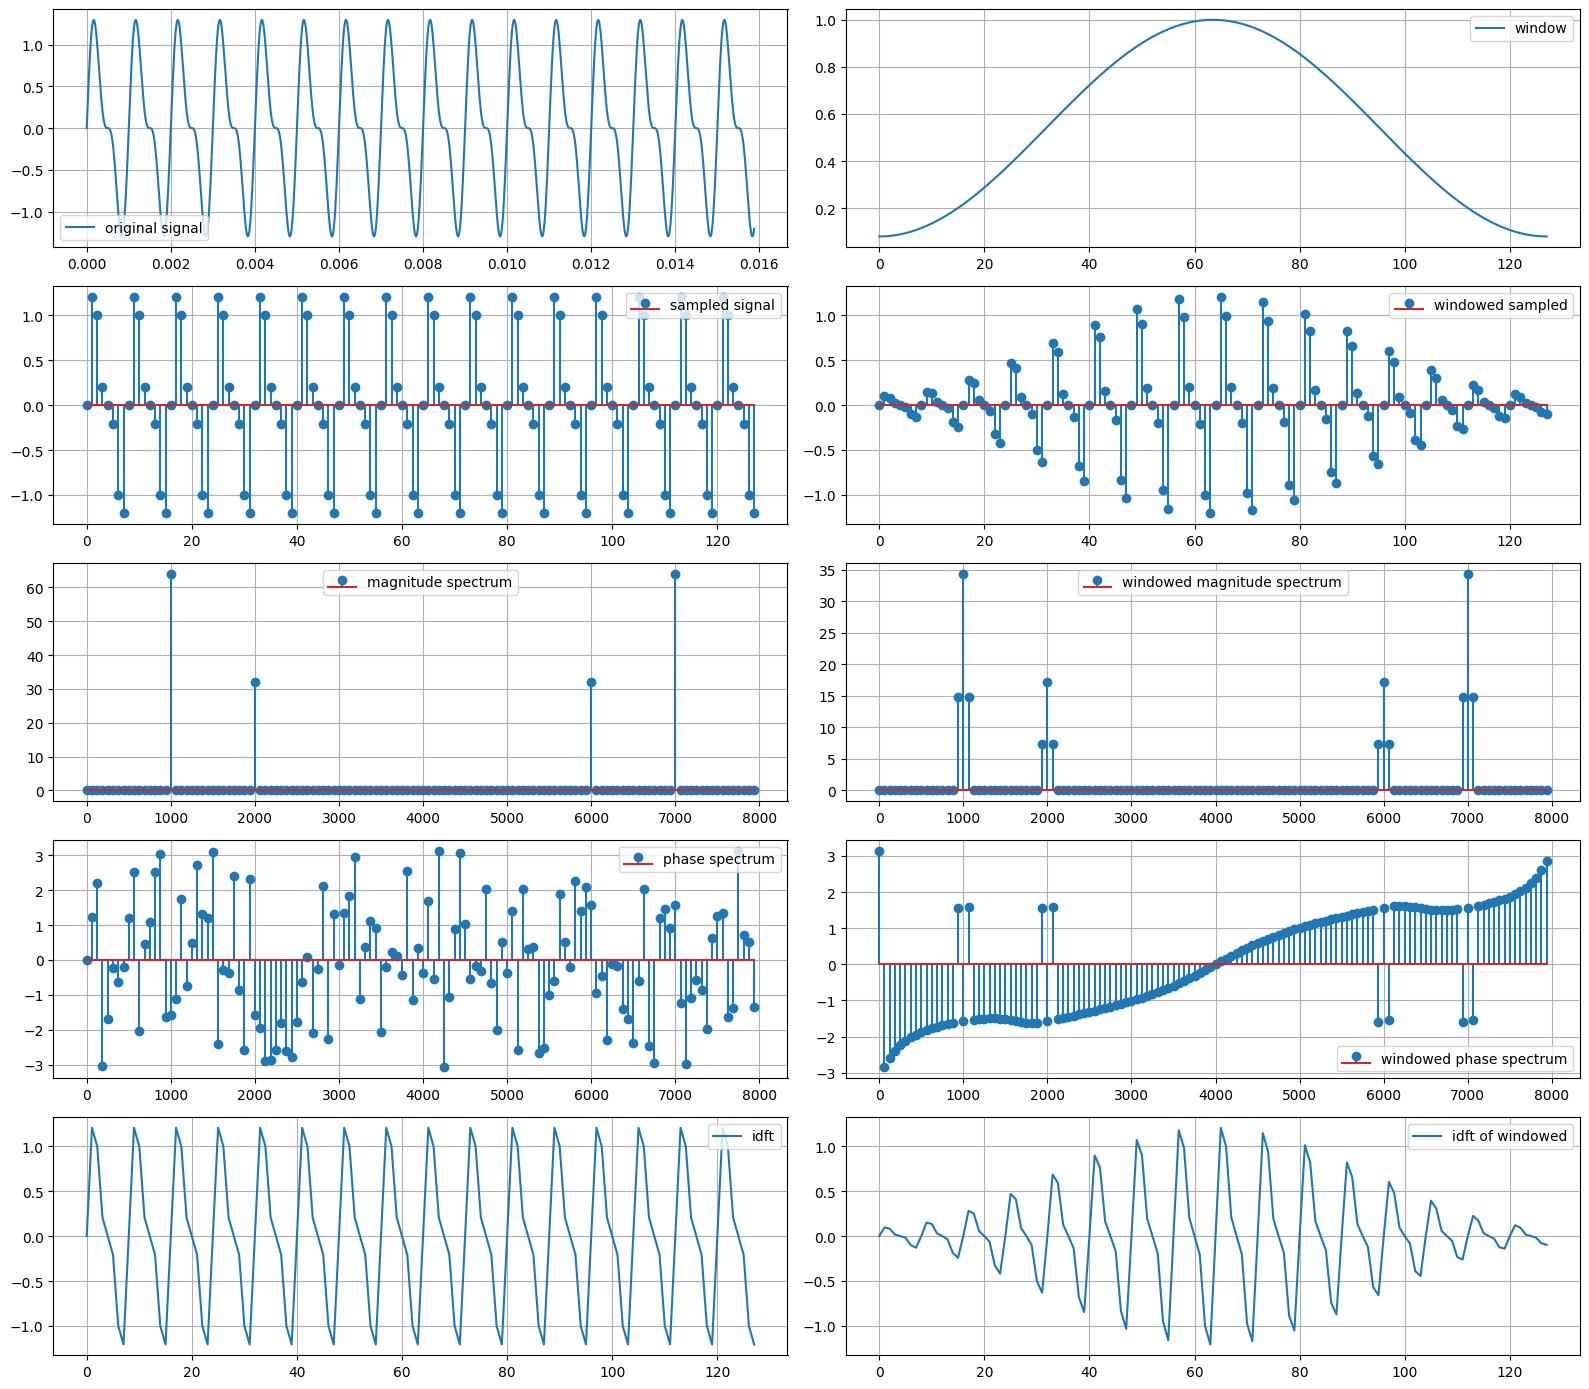

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#========================   define parameter =================================
N = 128
fs = 8000
Ts = 1 / fs
t = np.arange(N) * Ts
n = np.arange(N)
freq = np.arange(N) * fs / N



#======================   define signal  ====================================
def sig(ts):
  return np.sin(2*np.pi*1000*ts) + 0.5 * np.sin(2*np.pi*2000*ts + 4 * np.pi)



#========================= window  function ==========================
def han(N):
  return [(0.5 - 0.5 * np.cos(2*np.pi*n/(N-1))) for n in range(N)]

def ham(N):
  return [(0.54 - 0.46 * np.cos(2*np.pi*n / (N-1))) for n in range(N)]

#======================= magnitude, phase, power ============================
def mag(X):
  return [(np.sqrt(c.real **2 + c.imag**2)) for c in X]

def pha(X):
  return [(np.arctan2(c.imag, c.real)) for c in X]

def power(X):
  return [(c.real**2 + c.imag**2)for c in X]


#========================= plot original signal ============================
ta = np.linspace(0, (N-1)*Ts, 1000)
x = sig(ta)

plt.figure(figsize=(16,14))
plt.subplot(5,2,1)
plt.plot(ta, x , label = 'original signal')
plt.legend()
plt.grid(True)



#=========================   plot window =============================

plt.subplot(5,2,2)
plt.plot(n, ham(N), label = 'window')
plt.legend()
plt.grid(True)


#======================== plot sampled signal and windowed sample ===========================
plt.subplot(5,2,3)
signal = sig(t)
plt.stem(n, signal, label = 'sampled signal')
plt.grid(True)
plt.legend()

window = ham(N)
singal_windowed = signal * window

plt.subplot(5,2,4)
plt.stem(n, singal_windowed, label = 'windowed sampled')
plt.legend()
plt.grid(True)


#===========================  dft calculation function ========================
def dft_cal(x):
  X = np.zeros(N, dtype=complex)
  for m in range(N):
    sum = 0
    for n in range(N):
      sum += x[n] * np.exp(-2j*np.pi*n*m / N)
    X[m] = sum
  return X

X = dft_cal(signal)
X_w = dft_cal(singal_windowed)


#======================== idft calculation function ===================================

def idft(X):
  N = len(X)
  res = np.zeros(N, dtype=complex)

  for m in range(N):
    sum = 0
    for n in range(N):
      sum += X[n] * np.exp(2j*np.pi*n*m/N)
    res[m] = (sum / N)
  return res

#==================== magnitude spectrum ====================================
mg = mag(X)
mg_w = mag(X_w)

plt.subplot(5,2,5)
plt.stem(freq, mg, label = 'magnitude spectrum')
plt.legend()
plt.grid(True)

plt.subplot(5,2,6)
plt.stem(freq, mg_w, label = 'windowed magnitude spectrum')
plt.legend()
plt.grid(True)


#=====================   phase spectrum =========================
phase = pha(X)
phase_w = pha(X_w)

plt.subplot(5,2,7)
plt.stem(freq, phase, label = 'phase spectrum')
plt.legend()
plt.grid(True)

plt.subplot(5,2,8)
plt.stem(freq, phase_w, label = 'windowed phase spectrum')
plt.legend()
plt.grid(True)


#===================  idft calculation ===========================

x_idft = idft(X)
xidft_w = idft(X_w)

plt.subplot(5,2,9)
plt.plot(n, x_idft, label = 'idft')
plt.legend()
plt.grid(True)

plt.subplot(5,2,10)
plt.plot(n, xidft_w, label = 'idft of windowed')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()




 10. Design a low pass FIR filter to remove high-frequency noise from a signal using
convolution.

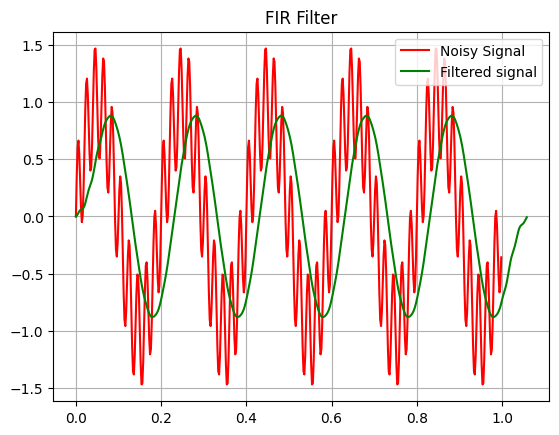

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fs = 500
t = np.arange(0,1,1/fs)
x =  np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*50*t)

def convolution(x,h):
    len_x = len(x)
    len_h= len(h)
    len_y = len_x+len_h-1
    y = []
    for n in range(len_y):
         sum=0
         for k in range(len_h):
              if 0<=n-k<len_x:
                   sum+=h[k]*x[n-k]
         y.append(sum)
    return y
def hanning(N):
     n = np.arange(N)
     return 0.5-.05*np.cos(2*np.pi*n/N-1)

def lowpassfilter(N,fc,fs):
     n = np.arange(N)
     h = np.sinc(2*fc*(n-((N-1)/2))/fs)*hanning(N)
     h/=np.sum(h)
     return h
h = lowpassfilter(N=31,fc=10,fs=fs)
y = convolution(x,h)
t1 = np.arange(len(y))/fs

plt.plot(t,x,label="Noisy Signal",color='r')
plt.plot(t1,y,label="Filtered signal",color="g")
plt.title("FIR Filter")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-39-702076136.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


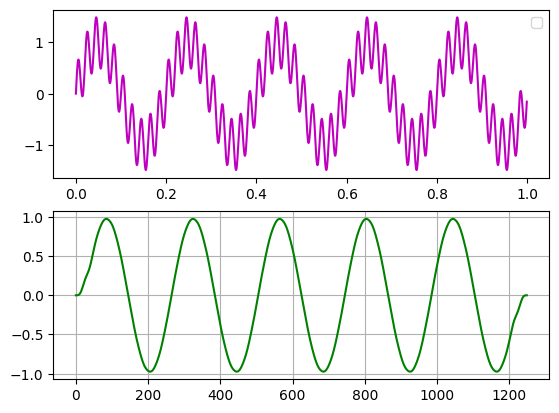

In [39]:
import numpy as np
import matplotlib.pyplot as plt

#===================== sampling setup =========================

fs = 1200
t = np.arange(0, 1, 1/fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)



#===================  convolution definition =========================
def convolution(x, h):
  N = len(x) + len(h) - 1
  y = []

  for i in range(N):
    sum = 0
    for k in range(len(x)):
      if 0<= i-k < len(h):
        sum  += x[k] * h[i-k]
    y.append(sum)
  return y


#=====================  impulse response definition ===================
def hann(N):
  return [(0.5 - 0.5 * np.cos(2*np.pi * n / (N-1))) for n in range(N)]

def gen_impulse(N, fc, fs):
  center = (N-1) / 2
  n = np.arange(N)
  h = np.sinc(2 * fc * (n - center) / fs )  * hann(N)
  h = h / np.sum(h)
  return h




#=======================   parameter ===============================
N = 51
fc = 10

h = gen_impulse(N, fc, fs)

x_f = convolution(x,h)
t1 = np.arange(len(x_f))


#====================  plot orginal signal =========================

plt.subplot(2,1,1)
plt.plot(t, x, color = 'm')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t1, x_f, 'g')
plt.grid(True)

plt.show()




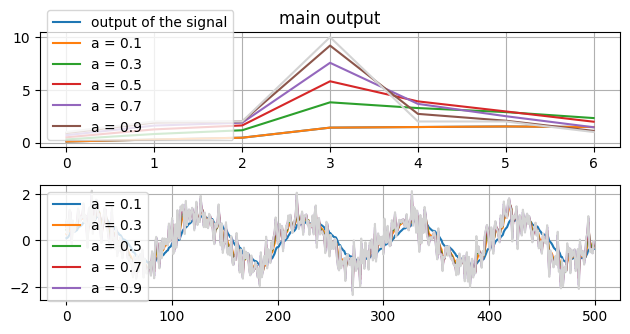

In [13]:
'''
consider a differencing equation:
y(n) = (1-a)*y(n-1) + a * x(n)

x(n) = [1, 2, 2, 10, 2, 2, 1]
here, 0 < a < 1

observation of y(n) apply diffent value of a

'''

import numpy as np
import matplotlib.pyplot as plt


x = np.array([1, 2, 2, 10, 2, 2, 1])

a = 0.1

y = np.zeros_like(x, dtype=float)
y[0] = a * x[0]



for n in range(1, len(x)):
    y[n] = ((1-a) * y[n-1] + a * x[n])


n = np.arange(0, len(x)+1)

plt.subplot(3,1,1)
plt.plot(y, label = 'output of the signal')



a_val = [0.1, 0.3, 0.5, 0.7, 0.9]


plt.subplot(3, 1, 1)
plt.title('main output')

for a in a_val:
    y = []
    y_prev = 0

    for n in range(len(x)):
        y_curr = (1 - a) * y_prev + a * x[n]
        y.append(y_curr)
        y_prev = y_curr

    plt.plot(y, label=f'a = {a}')


plt.plot(x, 'lightgray')
plt.grid(True)
plt.legend()


np.random.seed(0)
n = np.linspace(0, 0.01, 500)
input = np.sin( 2 * np.pi * 500 * n)
x =  np.sin( 2 * np.pi * 500 * n) + 0.5 * np.random.randn(len(n))



y = np.zeros_like(x, dtype=float)
y[0] = a * x[0]

plt.subplot(3,1,2)

for a in a_val:
    y = []

    y_prev = 0
    for n in range(len(x)):
        y_curr = (1 - a) * y_prev + a * x[n]
        y.append(y_curr)
        y_prev = y_curr

    plt.plot(y, label=f'a = {a}')

#plt.plot(x, 'lightgray')
plt.plot(x, 'lightgray' )
plt.grid()
plt.legend()








plt.tight_layout()
plt.show()

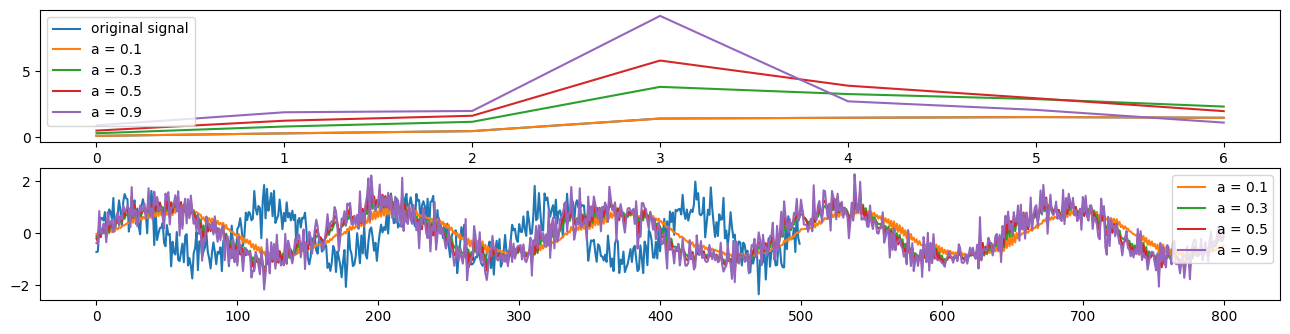

In [36]:
'''
consider a differencing equation:
y(n) = (1-a)*y(n-1) + a * x(n)

x(n) = [1, 2, 2, 10, 2, 2, 1]
here, 0 < a < 1

observation of y(n) apply diffent value of a

'''


import numpy as np
import matplotlib.pyplot as plt

a = 0.1
x = np.array([1, 2, 2, 10, 2, 2, 1])
y = np.zeros(len(x), dtype= float)

y[0] = a * x[0]

for n in range(1, len(x)):
  y[n] = (1-a) * y[n-1] +  a * x[n]

plt.figure(figsize=(16,12))
plt.subplot(6,1,1)
plt.plot( y, label = f'original signal')
plt.legend()


a_val = [0.1, 0.3, 0.5, 0.9]

for a in a_val:
  y = []
  y.append(a * x[0])
  for n in range(1, len(x)):
    tmp = (1-a) * y[n-1] + a * x[n]
    y.append(tmp)

  plt.plot(y, label = f'a = {a}')
  plt.legend()


n = np.linspace(0, 0.01, 800)
x = np.sin(2 * np.pi * 500 * n) + 0.5 * np.random.randn(len(n))

plt.subplot(6,1,2)
plt.plot(signal)


for i, a in enumerate(a_val):
  y = []
  y.append(a * x[0])
  for n in range(len(x)):
    y.append((1-a) * y[n-1] + a * x[n])

  #plt.subplot(6,1,i+3)
  plt.plot(y, label = f'a = {a}')
  plt.legend()




plt.show()



